# 2D CNN USC-HAD

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import seaborn as sns

In [3]:
cd C:\Users\Callum Murton\OneDrive\Documents\Callum\Uni Work\Data Analytics MSc\Dissertation Project\Experiment\Data Preprocessing\Data\Window Data

C:\Users\Callum Murton\OneDrive\Documents\Callum\Uni Work\Data Analytics MSc\Dissertation Project\Experiment\Data Preprocessing\Data\Window Data


## Import the Data

In [4]:
# function to import the datasets
# dataset_short is the first part of the dataset name, e.g. UCI-HAR is UCI
# the data type is either features of labels
# the window size is the time in seconds a window lasts, 1.5 and 2.5 seconds should be written as 1_5 and 2_5, respectively
# the overlap is a percentage
def import_data(dataset, dataset_short, features_or_labels, data_type, window_size, overlap):
    path = f'{dataset}/{dataset_short}_{features_or_labels}_{data_type}_{window_size}_sec_{overlap}ol.npy'
    if Path(path).is_file():
        data = np.load(path)
        return data
    else:
        return None

In [5]:
# import the various datasets
X_train_USC_1_25 = import_data('USC-HAD','USC','features','train','1','25')
X_test_USC_1_25 = import_data('USC-HAD','USC','features','test','1','25')
y_train_USC_1_25 = import_data('USC-HAD','USC','labels','train','1','25')
y_test_USC_1_25 = import_data('USC-HAD','USC','labels','test','1','25')

X_train_USC_1_50 = import_data('USC-HAD','USC','features','train','1','50')
X_test_USC_1_50 = import_data('USC-HAD','USC','features','test','1','50')
y_train_USC_1_50 = import_data('USC-HAD','USC','labels','train','1','50')
y_test_USC_1_50 = import_data('USC-HAD','USC','labels','test','1','50')

X_train_USC_1_75 = import_data('USC-HAD','USC','features','train','1','75')
X_test_USC_1_75 = import_data('USC-HAD','USC','features','test','1','75')
y_train_USC_1_75 = import_data('USC-HAD','USC','labels','train','1','75')
y_test_USC_1_75 = import_data('USC-HAD','USC','labels','test','1','75')

X_train_USC_1_5_25 = import_data('USC-HAD','USC','features','train','1_5','25')
X_test_USC_1_5_25 = import_data('USC-HAD','USC','features','test','1_5','25')
y_train_USC_1_5_25 = import_data('USC-HAD','USC','labels','train','1_5','25')
y_test_USC_1_5_25 = import_data('USC-HAD','USC','labels','test','1_5','25')

X_train_USC_1_5_50 = import_data('USC-HAD','USC','features','train','1_5','50')
X_test_USC_1_5_50 = import_data('USC-HAD','USC','features','test','1_5','50')
y_train_USC_1_5_50 = import_data('USC-HAD','USC','labels','train','1_5','50')
y_test_USC_1_5_50 = import_data('USC-HAD','USC','labels','test','1_5','50')

X_train_USC_1_5_75 = import_data('USC-HAD','USC','features','train','1_5','75')
X_test_USC_1_5_75 = import_data('USC-HAD','USC','features','test','1_5','75')
y_train_USC_1_5_75 = import_data('USC-HAD','USC','labels','train','1_5','75')
y_test_USC_1_5_75 = import_data('USC-HAD','USC','labels','test','1_5','75')

X_train_USC_2_25 = import_data('USC-HAD','USC','features','train','2','25')
X_test_USC_2_25 = import_data('USC-HAD','USC','features','test','2','25')
y_train_USC_2_25 = import_data('USC-HAD','USC','labels','train','2','25')
y_test_USC_2_25 = import_data('USC-HAD','USC','labels','test','2','25')

X_train_USC_2_50 = import_data('USC-HAD','USC','features','train','2','50')
X_test_USC_2_50 = import_data('USC-HAD','USC','features','test','2','50')
y_train_USC_2_50 = import_data('USC-HAD','USC','labels','train','2','50')
y_test_USC_2_50 = import_data('USC-HAD','USC','labels','test','2','50')

X_train_USC_2_75 = import_data('USC-HAD','USC','features','train','2','75')
X_test_USC_2_75 = import_data('USC-HAD','USC','features','test','2','75')
y_train_USC_2_75 = import_data('USC-HAD','USC','labels','train','2','75')
y_test_USC_2_75 = import_data('USC-HAD','USC','labels','test','2','75')

X_train_USC_2_5_25 = import_data('USC-HAD','USC','features','train','2_5','25')
X_test_USC_2_5_25 = import_data('USC-HAD','USC','features','test','2_5','25')
y_train_USC_2_5_25 = import_data('USC-HAD','USC','labels','train','2_5','25')
y_test_USC_2_5_25 = import_data('USC-HAD','USC','labels','test','2_5','25')

X_train_USC_2_5_50 = import_data('USC-HAD','USC','features','train','2_5','50')
X_test_USC_2_5_50 = import_data('USC-HAD','USC','features','test','2_5','50')
y_train_USC_2_5_50 = import_data('USC-HAD','USC','labels','train','2_5','50')
y_test_USC_2_5_50 = import_data('USC-HAD','USC','labels','test','2_5','50')

X_train_USC_2_5_75 = import_data('USC-HAD','USC','features','train','2_5','75')
X_test_USC_2_5_75 = import_data('USC-HAD','USC','features','test','2_5','75')
y_train_USC_2_5_75 = import_data('USC-HAD','USC','labels','train','2_5','75')
y_test_USC_2_5_75 = import_data('USC-HAD','USC','labels','test','2_5','75')

In [6]:
# zero offset the class values
y_test_USC_1_25 = y_test_USC_1_25.astype(int) - 1
y_train_USC_1_25 = y_train_USC_1_25.astype(int) - 1

y_test_USC_1_50 = y_test_USC_1_50.astype(int) - 1
y_train_USC_1_50 = y_train_USC_1_50.astype(int) - 1

y_test_USC_1_75 = y_test_USC_1_75.astype(int) - 1
y_train_USC_1_75 = y_train_USC_1_75.astype(int) - 1

y_test_USC_1_5_25 = y_test_USC_1_5_25.astype(int) - 1
y_train_USC_1_5_25 = y_train_USC_1_5_25.astype(int) - 1

y_test_USC_1_5_50 = y_test_USC_1_5_50.astype(int) - 1
y_train_USC_1_5_50 = y_train_USC_1_5_50.astype(int) - 1

y_test_USC_1_5_75 = y_test_USC_1_5_75.astype(int) - 1
y_train_USC_1_5_75 = y_train_USC_1_5_75.astype(int) - 1

y_test_USC_2_25 = y_test_USC_2_25.astype(int) - 1
y_train_USC_2_25 = y_train_USC_2_25.astype(int) - 1

y_test_USC_2_50 = y_test_USC_2_50.astype(int) - 1
y_train_USC_2_50 = y_train_USC_2_50.astype(int) - 1

y_test_USC_2_75 = y_test_USC_2_75.astype(int) - 1
y_train_USC_2_75 = y_train_USC_2_75.astype(int) - 1

y_test_USC_2_5_25 = y_test_USC_2_5_25.astype(int) - 1
y_train_USC_2_5_25 = y_train_USC_2_5_25.astype(int) - 1

y_test_USC_2_5_50 = y_test_USC_2_5_50.astype(int) - 1
y_train_USC_2_5_50 = y_train_USC_2_5_50.astype(int) - 1

y_test_USC_2_5_75 = y_test_USC_2_5_75.astype(int) - 1
y_train_USC_2_5_75 = y_train_USC_2_5_75.astype(int) - 1

In [7]:
# One hot encode the test sets
y_test_cat_USC_1_25 = keras.utils.to_categorical(y_test_USC_1_25)
y_train_cat_USC_1_25 = keras.utils.to_categorical(y_train_USC_1_25)

y_test_cat_USC_1_50 = keras.utils.to_categorical(y_test_USC_1_50)
y_train_cat_USC_1_50 = keras.utils.to_categorical(y_train_USC_1_50)

y_test_cat_USC_1_75 = keras.utils.to_categorical(y_test_USC_1_75)
y_train_cat_USC_1_75 = keras.utils.to_categorical(y_train_USC_1_75)

y_test_cat_USC_1_5_25 = keras.utils.to_categorical(y_test_USC_1_5_25)
y_train_cat_USC_1_5_25 = keras.utils.to_categorical(y_train_USC_1_5_25)

y_test_cat_USC_1_5_50 = keras.utils.to_categorical(y_test_USC_1_5_50)
y_train_cat_USC_1_5_50 = keras.utils.to_categorical(y_train_USC_1_5_50)

y_test_cat_USC_1_5_75 = keras.utils.to_categorical(y_test_USC_1_5_75)
y_train_cat_USC_1_5_75 = keras.utils.to_categorical(y_train_USC_1_5_75)

y_test_cat_USC_2_25 = keras.utils.to_categorical(y_test_USC_2_25)
y_train_cat_USC_2_25 = keras.utils.to_categorical(y_train_USC_2_25)

y_test_cat_USC_2_50 = keras.utils.to_categorical(y_test_USC_2_50)
y_train_cat_USC_2_50 = keras.utils.to_categorical(y_train_USC_2_50)

y_test_cat_USC_2_75 = keras.utils.to_categorical(y_test_USC_2_75)
y_train_cat_USC_2_75 = keras.utils.to_categorical(y_train_USC_2_75)

y_test_cat_USC_2_5_25 = keras.utils.to_categorical(y_test_USC_2_5_25)
y_train_cat_USC_2_5_25 = keras.utils.to_categorical(y_train_USC_2_5_25)

y_test_cat_USC_2_5_50 = keras.utils.to_categorical(y_test_USC_2_5_50)
y_train_cat_USC_2_5_50 = keras.utils.to_categorical(y_train_USC_2_5_50)

y_test_cat_USC_2_5_75 = keras.utils.to_categorical(y_test_USC_2_5_75)
y_train_cat_USC_2_5_75 = keras.utils.to_categorical(y_train_USC_2_5_75)

## CNN Model

In [12]:
# creating model
def CNN(X_train, y_train, filters):
    # no. of activities for the units of the final fully connected layer
    no_activities = len(np.unique(y_train))
    # enables the stacking of layers into a model 
    model = Sequential()
    # stacking layers
    # first convolution
    model.add(Conv2D(filters=filters, kernel_size=(5,5),padding='same',input_shape=X_train.shape[1:], activation='relu'))
    # max pooling of size 2
    model.add(MaxPooling2D(2,2))
    # second convolution, filter size is doubled
    model.add(Conv2D(filters=filters*2,kernel_size=(3,3),padding='same',activation='relu'))
    # max pooling of size 2
    model.add(MaxPooling2D(2,2))
    # flattern the data
    model.add(Flatten())
    # fully connected layers
    model.add(Dense(units=100,activation='relu'))
    model.add(Dense(units=no_activities, activation='softmax'))
    # summarises the model
    model.summary()
    # compliing the model defines the loss function, optimiser and the metrics
    model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
    # returns the CNN model
    return model

In [28]:
# calls the model, fits and makes predictiosn for the UCI-HAR data
# prints the classifcation report metrics and creates a confusion matrix plot
def model_data_USC(X_train, y_train, y_train_cat, X_test, y_test_cat, filters, epochs):
    # call the CNN model function
    model = CNN(X_train,y_train,filters)
    # defines early stopping monitor
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3)
    # fits the CNN model
    model.fit(x=X_train, y=y_train_cat, epochs=epochs, batch_size=1000, validation_data=(X_test,y_test_cat), callbacks=[callback])
    # collects the loss, accuracy, validation loss and the validation accuracy as a dataframe
    model_feat = pd.DataFrame(model.history.history)
    # creates a sub dataframe of the loss and validation history from model_feat
    model_loss = model_feat[['loss','val_loss']]
    # plots the loss and val loss over time
    plt.plot(model_loss['loss'], label='training')
    plt.plot(model_loss['val_loss'], label='validation')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc="upper right")
    # plt.savefig('val_loss.png',bbox_inches="tight")
    # using the model to make predictions of the test set
    y_pred = model.predict(X_test)
    # reverts the one-hot encoded labels to a list of activities
    y_pred = np.argmax(y_pred, axis=1)
    y_actual = np.argmax(y_test_cat, axis=1)
    # print classification metrics of the prediction 
    print(classification_report(y_actual,y_pred))
    # confusion matrix
    con_mat = confusion_matrix(y_actual,y_pred)
    # the activities in the dataset
    activities = ['Walking Forward','Walking Left','Walking Right','Walking Upstairs','Walking Downstairs','Running Forward','Jumping Up','Sitting','Standing','Sleeping','Elevator Up','Elevator Down']
    # a plot of the confusion matrix
    plt.figure(figsize=(16,14))
    sns.heatmap(con_mat, xticklabels=activities, yticklabels=activities, fmt='d',annot=True, cmap="Blues")
    sns.set(font_scale=1.5)
    plt.title("Confusion matrix", fontsize=30)
    plt.ylabel('Performed Activity', fontsize=26)
    plt.xlabel('Predicted Performed Activity', fontsize=26)
    plt.show()

### 1 Second

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 5, 5, 32)          4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 2, 2, 32)         0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 128)               0         
                                                                 
 dense_24 (Dense)            (None, 100)             

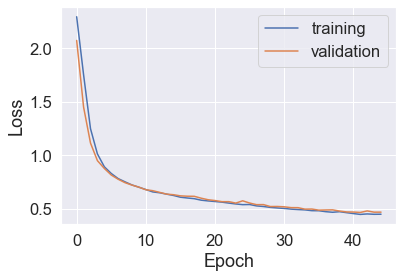

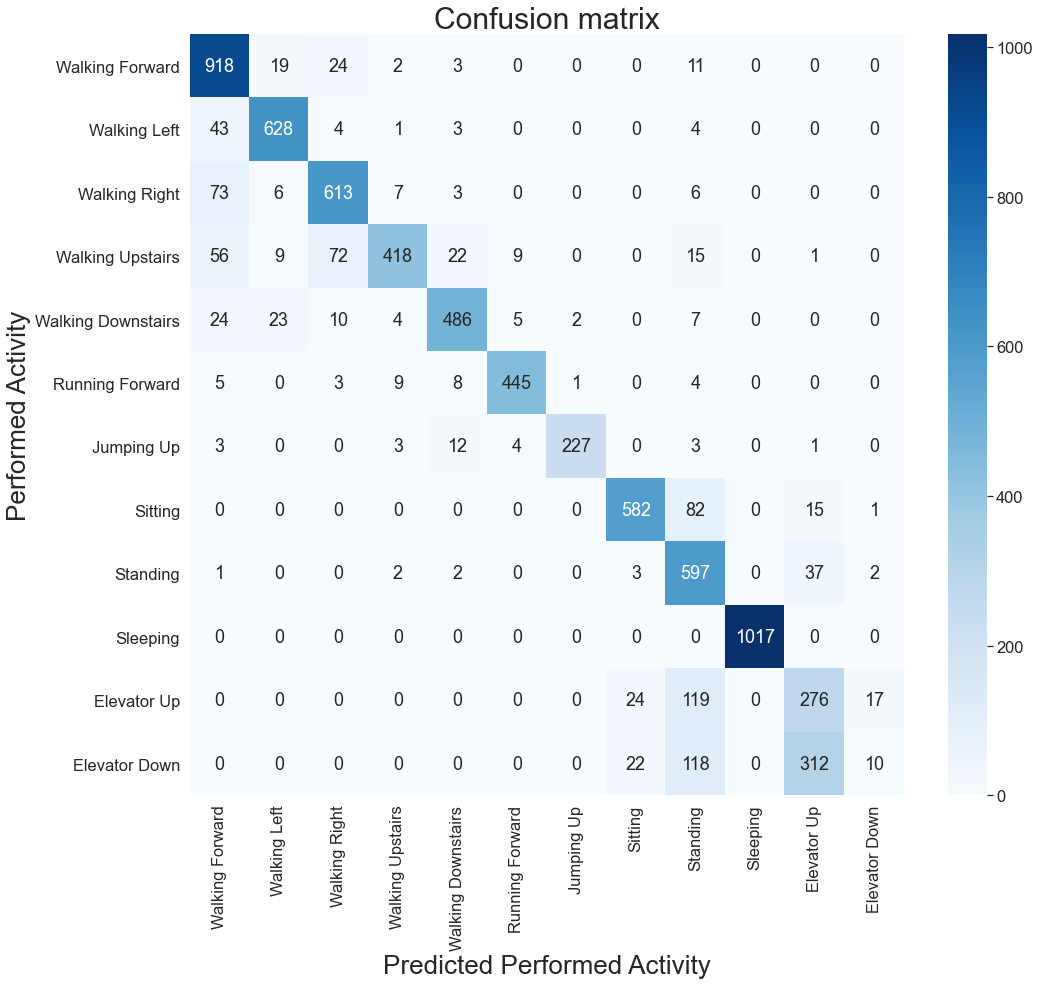

In [29]:
model_data_USC(X_train_USC_1_25,y_test_USC_1_25,y_train_cat_USC_1_25,X_test_USC_1_25,y_test_cat_USC_1_25,16,1000)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 5, 5, 32)          4640      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 2, 2, 32)         0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 100)             

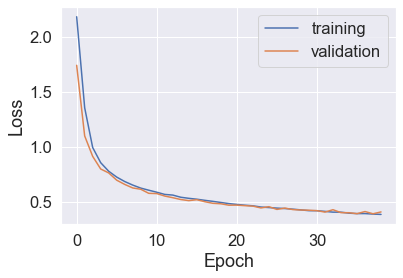

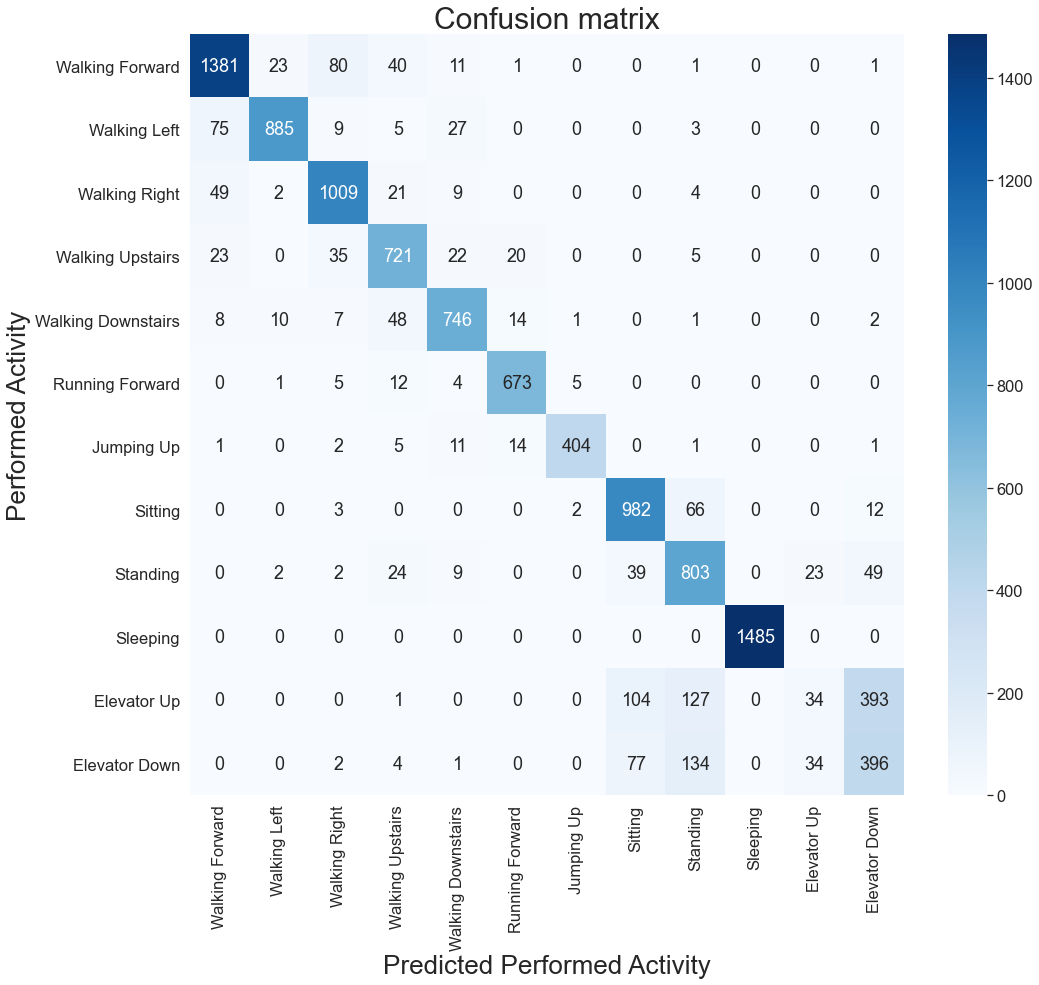

In [30]:
model_data_USC(X_train_USC_1_50,y_test_USC_1_50,y_train_cat_USC_1_50,X_test_USC_1_50,y_test_cat_USC_1_50,16,1000)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 5, 5, 32)          4640      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 2, 2, 32)         0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 128)               0         
                                                                 
 dense_28 (Dense)            (None, 100)             

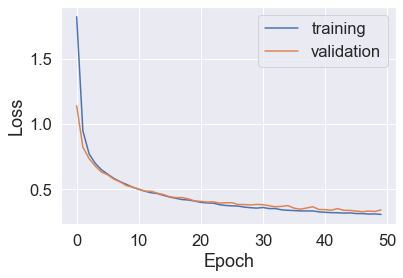

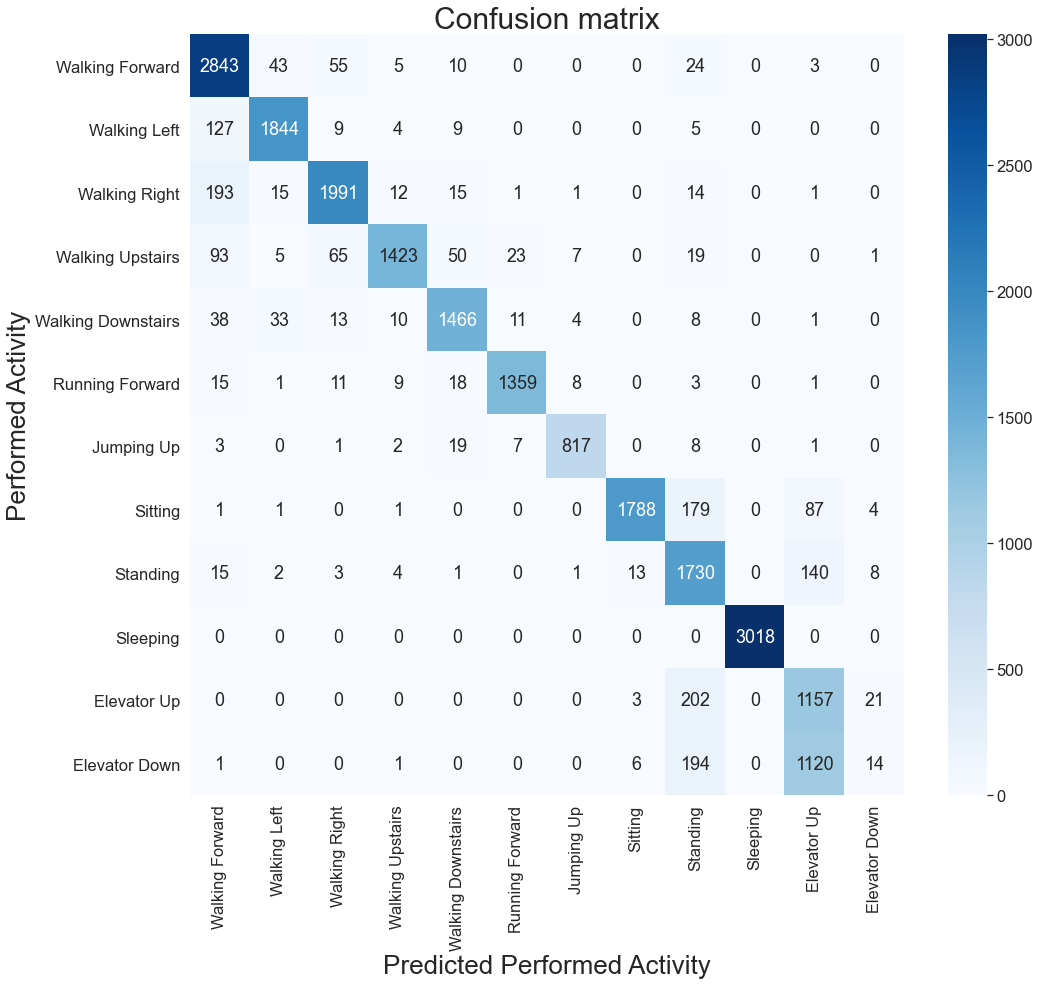

In [31]:
model_data_USC(X_train_USC_1_75,y_test_USC_1_75,y_train_cat_USC_1_75,X_test_USC_1_75,y_test_cat_USC_1_75,16,1000)

### 1.5 Second

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 12, 12, 20)        3020      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 6, 6, 20)         0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 6, 6, 40)          7240      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 3, 3, 40)         0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 360)               0         
                                                                 
 dense_30 (Dense)            (None, 100)             

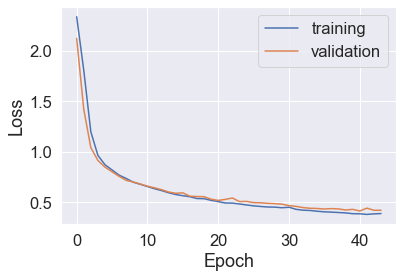

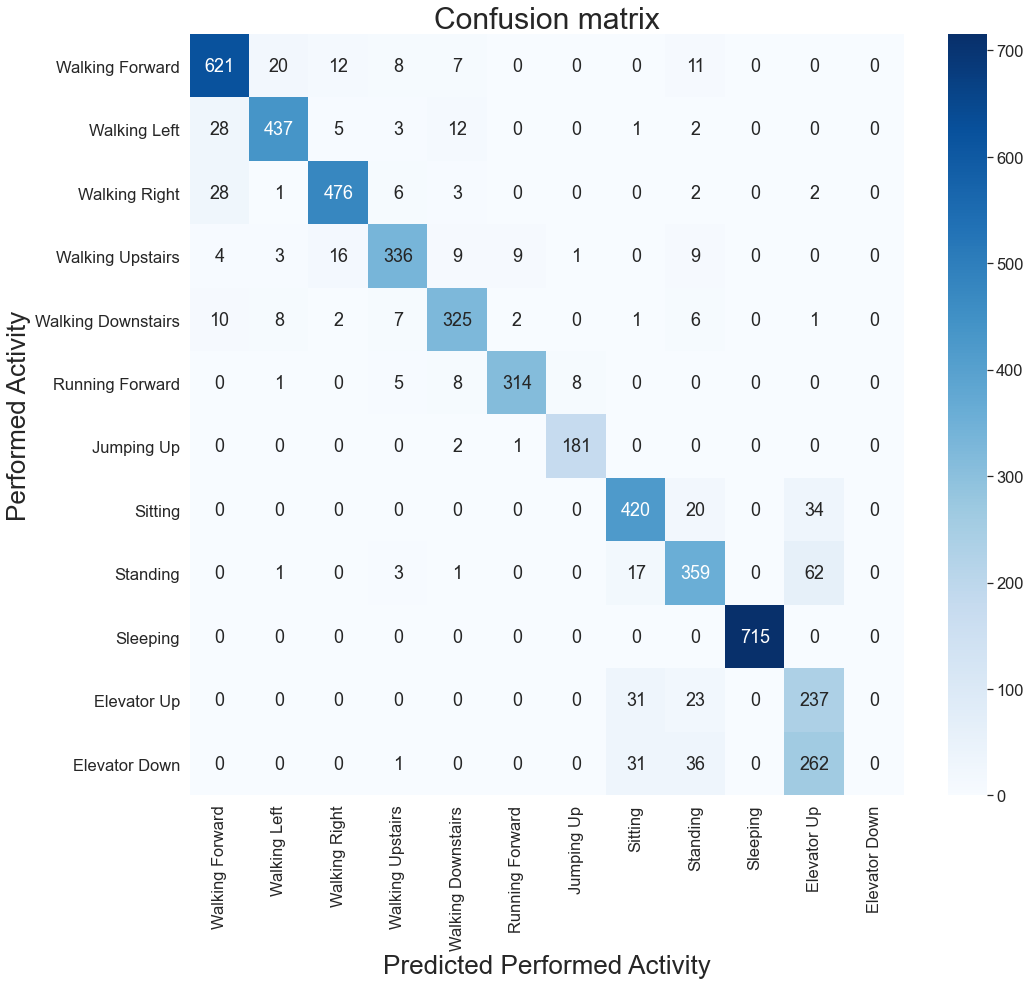

In [32]:
model_data_USC(X_train_USC_1_5_25,y_test_USC_1_5_25,y_train_cat_USC_1_5_25,X_test_USC_1_5_25,y_test_cat_USC_1_5_25,20,1000)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 12, 12, 20)        3020      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 6, 6, 20)         0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 6, 6, 40)          7240      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 3, 3, 40)         0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 360)               0         
                                                                 
 dense_32 (Dense)            (None, 100)             

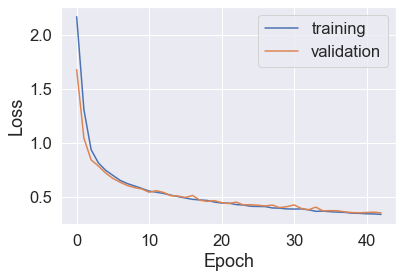

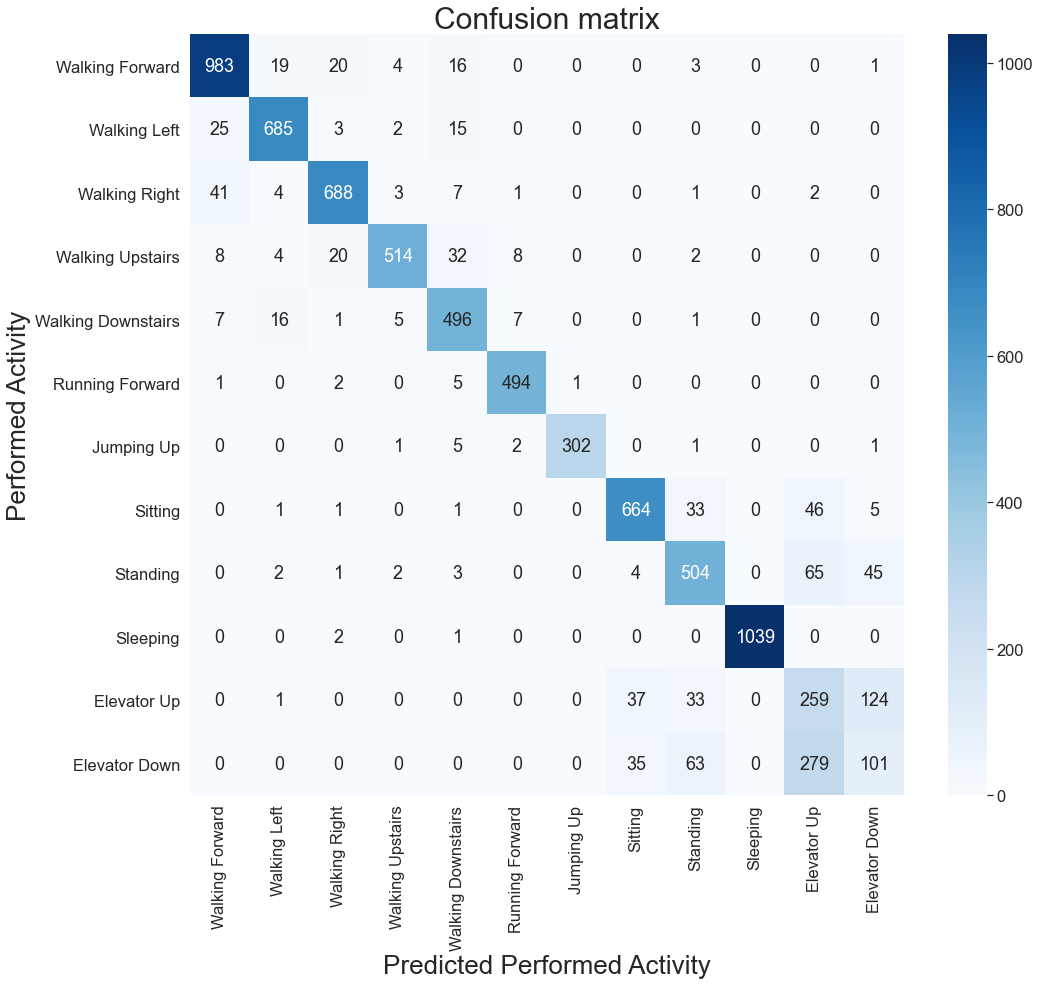

In [33]:
model_data_USC(X_train_USC_1_5_50,y_test_USC_1_5_50,y_train_cat_USC_1_5_50,X_test_USC_1_5_50,y_test_cat_USC_1_5_50,20,1000)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 12, 12, 20)        3020      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 6, 6, 20)         0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 6, 6, 40)          7240      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 3, 3, 40)         0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 360)               0         
                                                                 
 dense_34 (Dense)            (None, 100)             

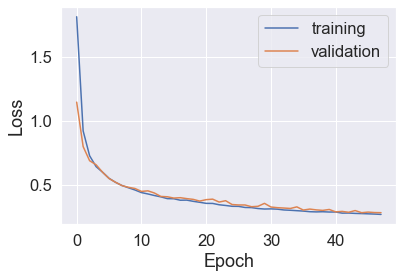

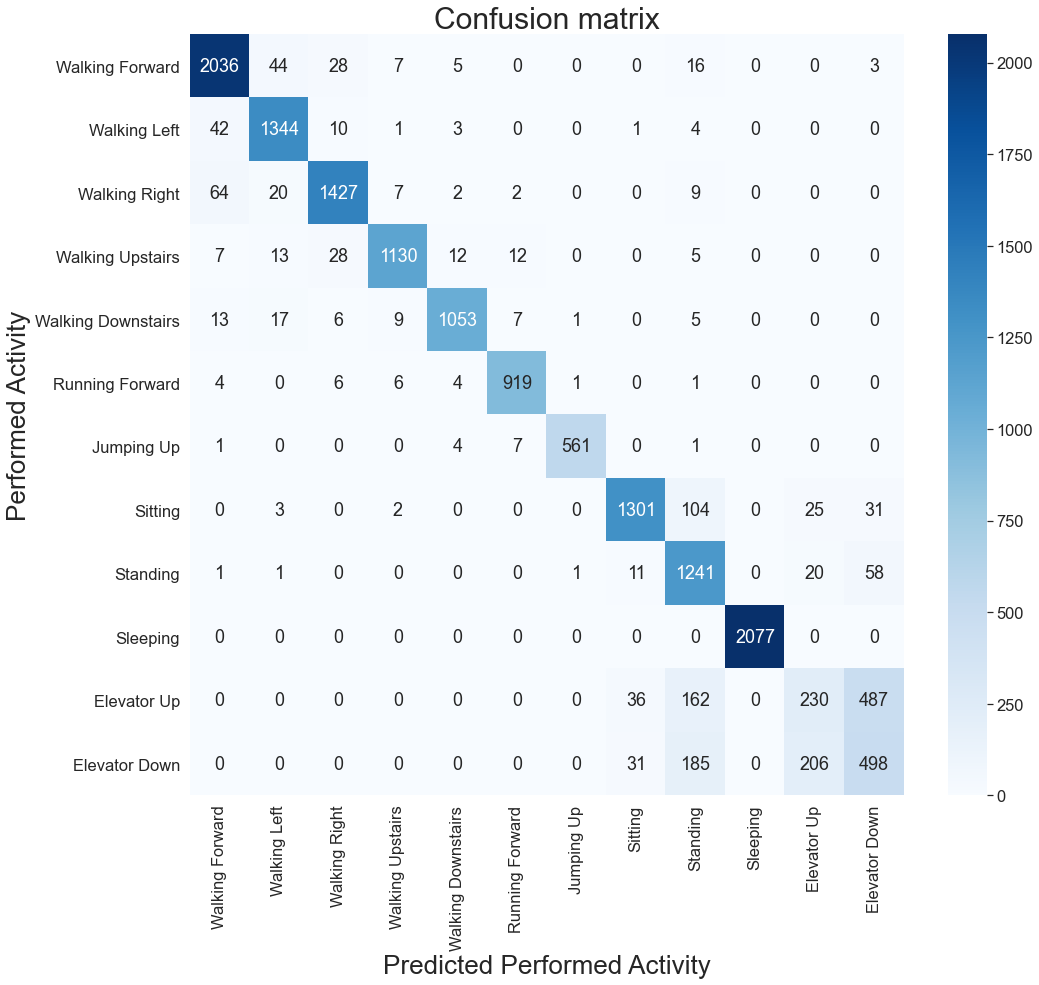

In [34]:
model_data_USC(X_train_USC_1_5_75,y_test_USC_1_5_75,y_train_cat_USC_1_5_75,X_test_USC_1_5_75,y_test_cat_USC_1_5_75,20,1000)

### 2 Second

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 14, 14, 24)        3624      
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 7, 7, 24)         0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 7, 7, 48)          10416     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 3, 3, 48)         0         
 g2D)                                                            
                                                                 
 flatten_24 (Flatten)        (None, 432)               0         
                                                                 
 dense_48 (Dense)            (None, 100)             

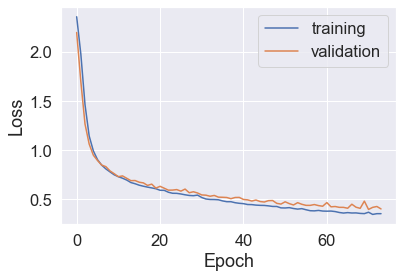

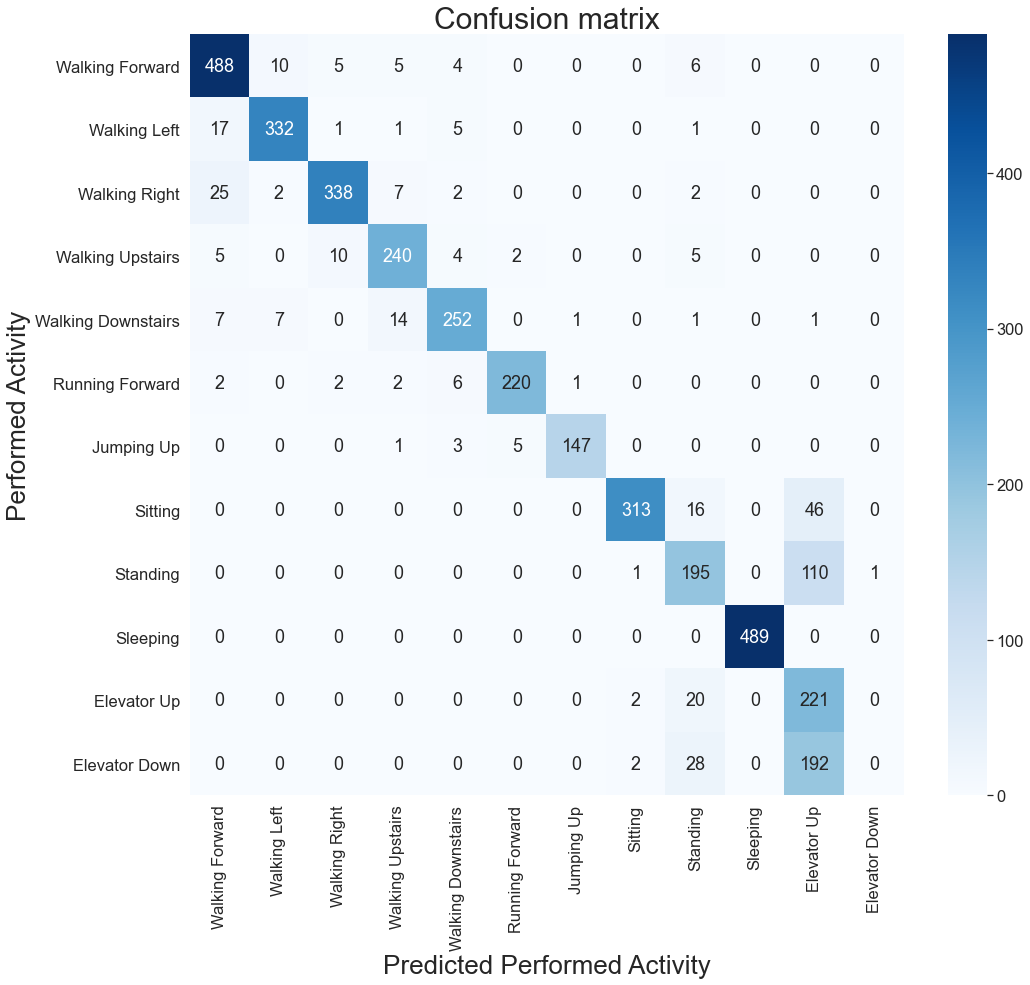

In [41]:
model_data_USC(X_train_USC_2_25,y_test_USC_2_25,y_train_cat_USC_2_25,X_test_USC_2_25,y_test_cat_USC_2_25,24,1000)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 14, 14, 24)        3624      
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 7, 7, 24)         0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 7, 7, 48)          10416     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 3, 3, 48)         0         
 g2D)                                                            
                                                                 
 flatten_19 (Flatten)        (None, 432)               0         
                                                                 
 dense_38 (Dense)            (None, 100)             

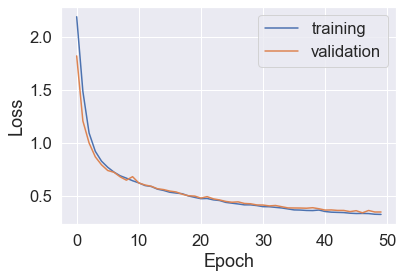

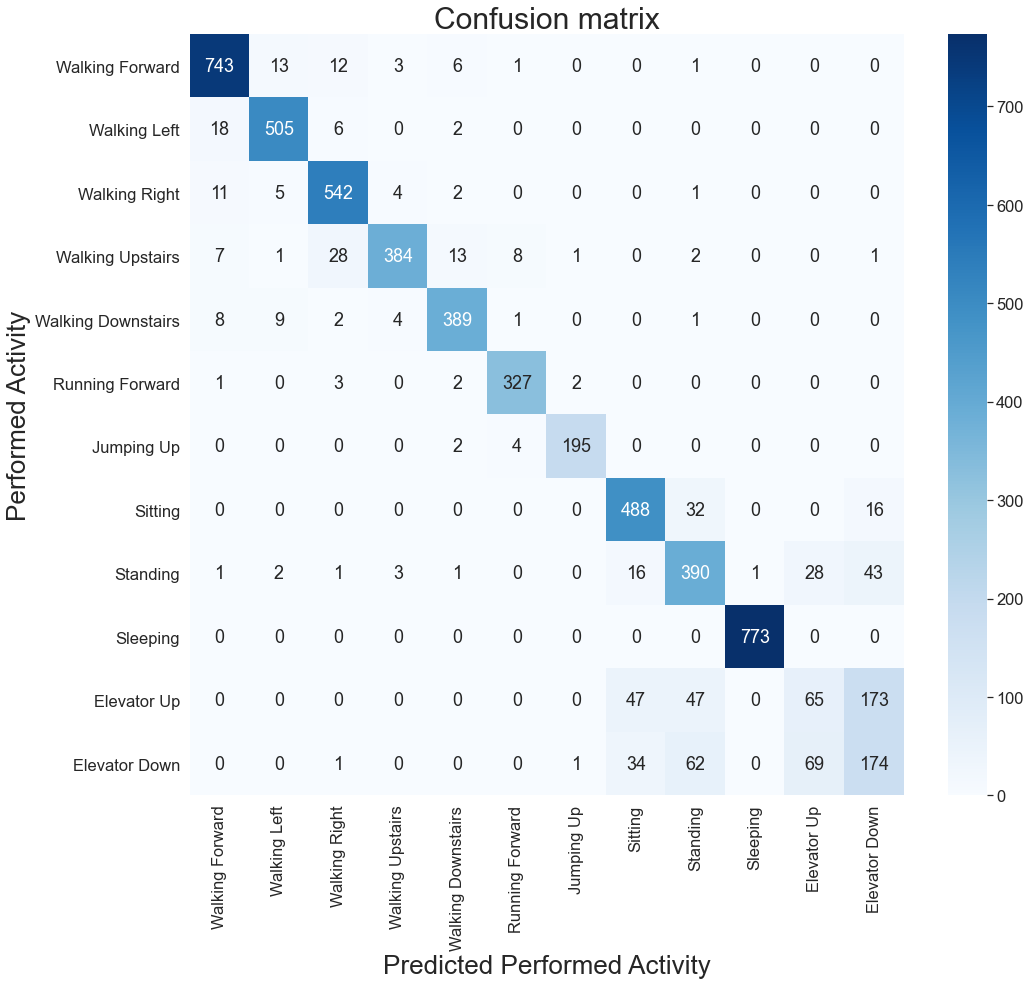

In [36]:
model_data_USC(X_train_USC_2_50,y_test_USC_2_50,y_train_cat_USC_2_50,X_test_USC_2_50,y_test_cat_USC_2_50,24,1000)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 14, 14, 24)        3624      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 7, 7, 24)         0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 7, 7, 48)          10416     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 3, 3, 48)         0         
 g2D)                                                            
                                                                 
 flatten_20 (Flatten)        (None, 432)               0         
                                                                 
 dense_40 (Dense)            (None, 100)             

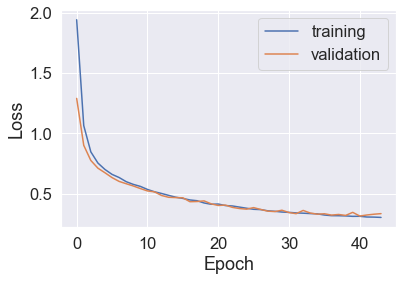

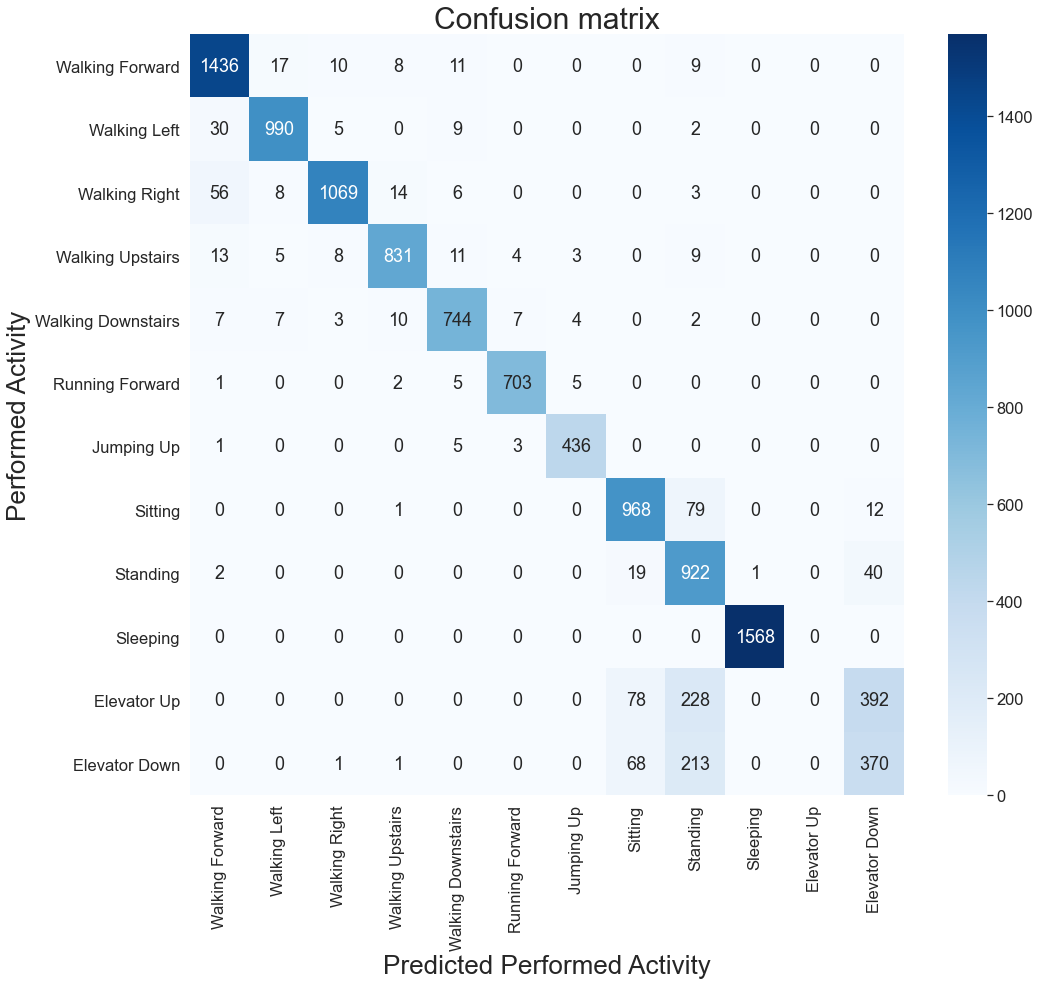

In [37]:
model_data_USC(X_train_USC_2_75,y_test_USC_2_75,y_train_cat_USC_2_75,X_test_USC_2_75,y_test_cat_USC_2_75,24,1000)

### 2.5 Second

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 16, 16, 28)        4228      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 8, 8, 28)         0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 8, 8, 56)          14168     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 4, 4, 56)         0         
 g2D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 896)               0         
                                                                 
 dense_42 (Dense)            (None, 100)             

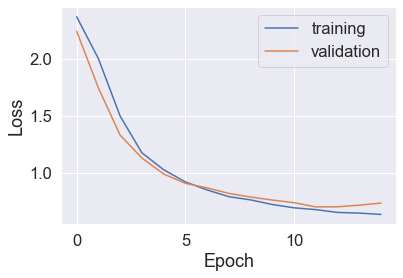

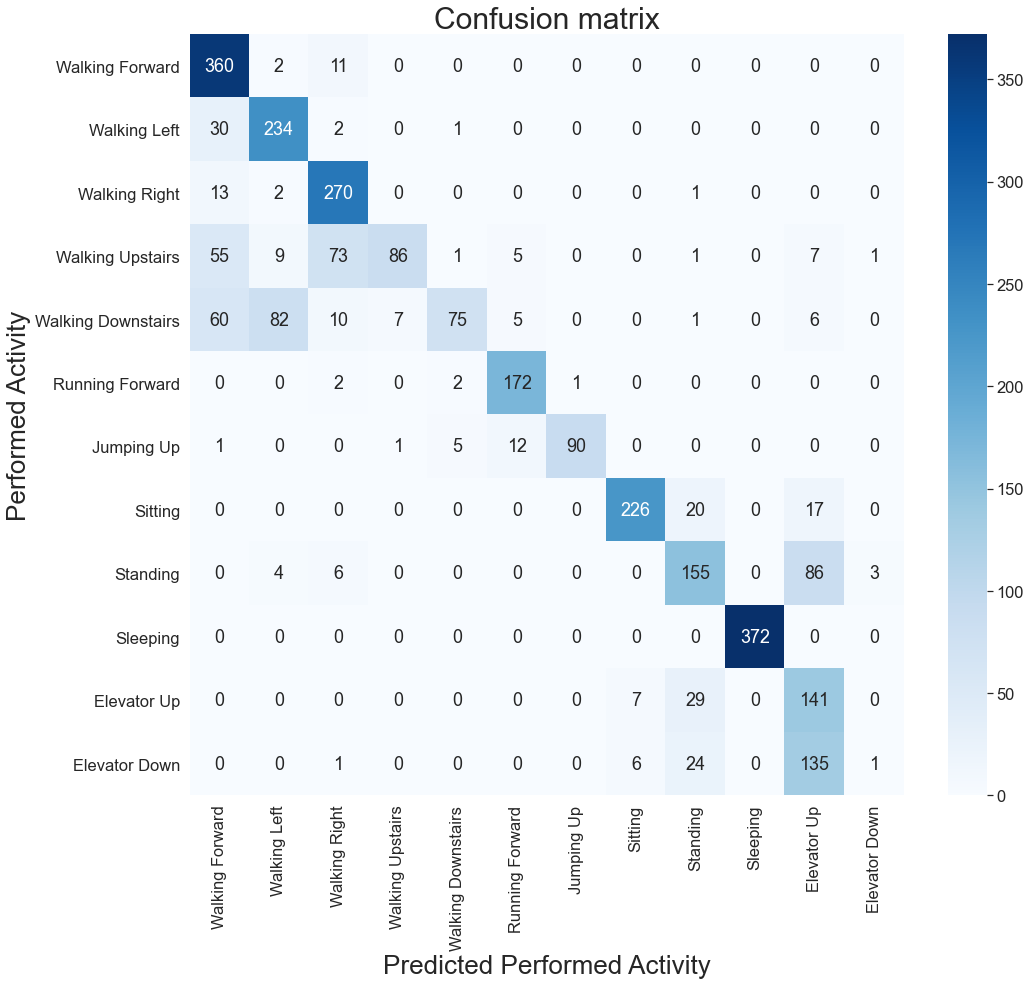

In [38]:
model_data_USC(X_train_USC_2_5_25,y_test_USC_2_5_25,y_train_cat_USC_2_5_25,X_test_USC_2_5_25,y_test_cat_USC_2_5_25,28,1000)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 16, 16, 28)        4228      
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 8, 8, 28)         0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 8, 8, 56)          14168     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 4, 4, 56)         0         
 g2D)                                                            
                                                                 
 flatten_22 (Flatten)        (None, 896)               0         
                                                                 
 dense_44 (Dense)            (None, 100)             

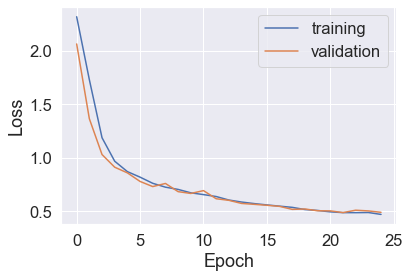

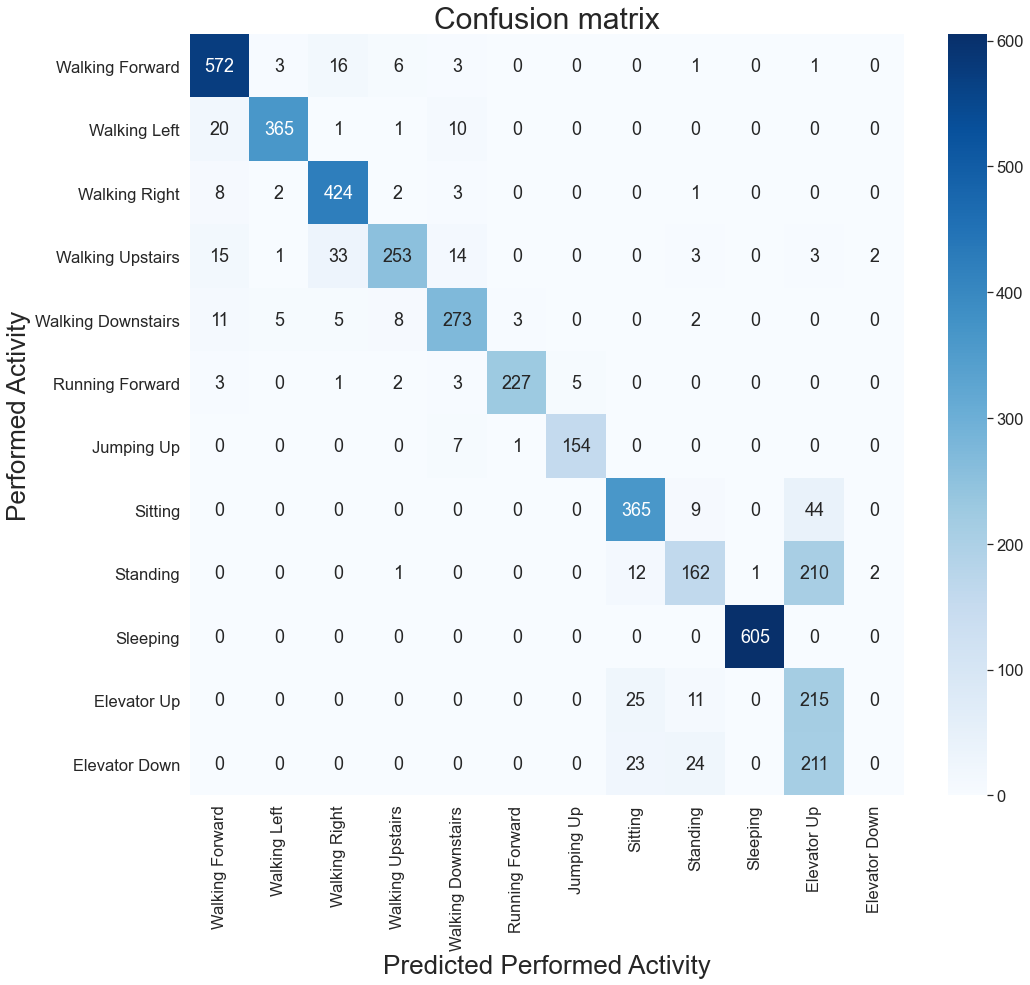

In [39]:
model_data_USC(X_train_USC_2_5_50,y_test_USC_2_5_50,y_train_cat_USC_2_5_50,X_test_USC_2_5_50,y_test_cat_USC_2_5_50,28,1000)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 16, 16, 28)        4228      
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 8, 8, 28)         0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 8, 8, 56)          14168     
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 4, 4, 56)         0         
 g2D)                                                            
                                                                 
 flatten_23 (Flatten)        (None, 896)               0         
                                                                 
 dense_46 (Dense)            (None, 100)             

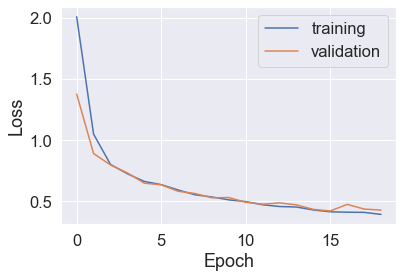

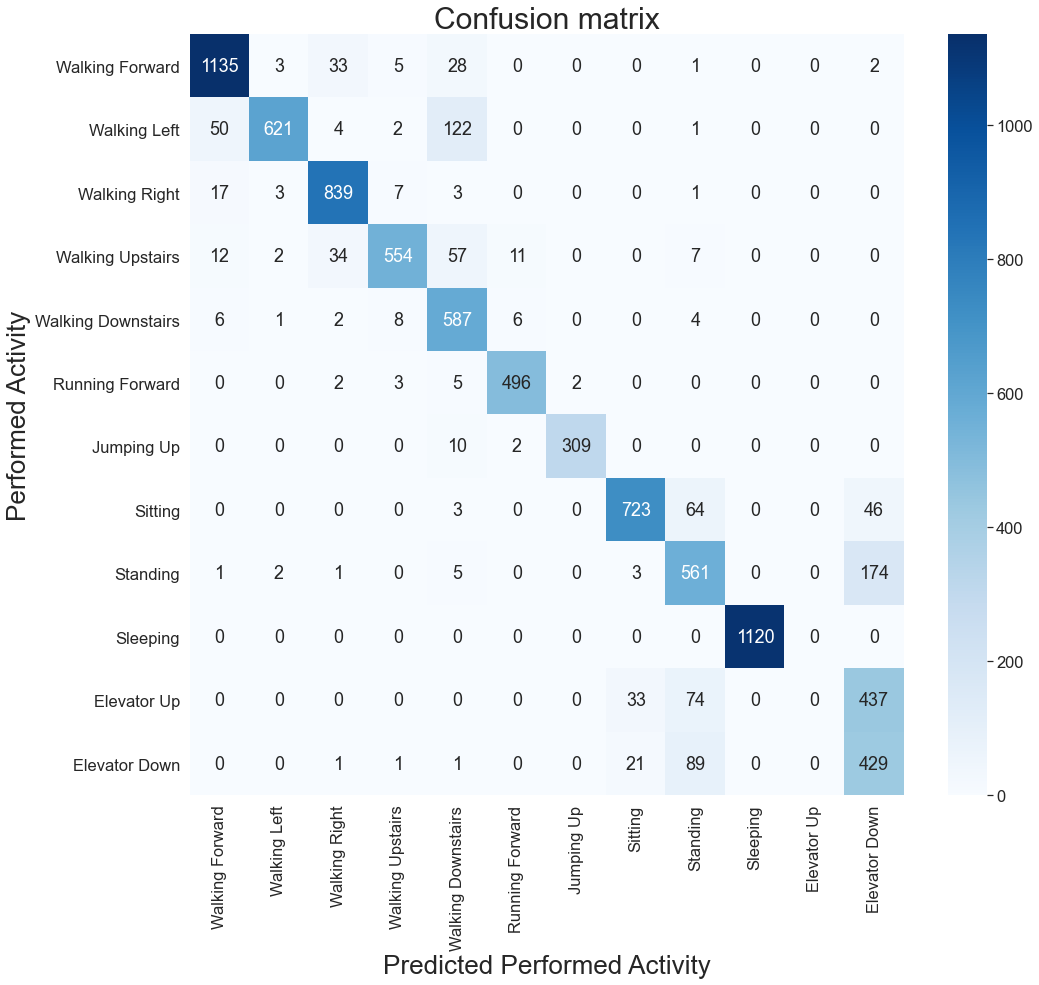

In [40]:
model_data_USC(X_train_USC_2_5_75,y_test_USC_2_5_75,y_train_cat_USC_2_5_75,X_test_USC_2_5_75,y_test_cat_USC_2_5_75,28,1000)